<a href="https://colab.research.google.com/github/benson40/Mini-Project/blob/main/Mini_Project_Image_Classification_using_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gathering Data using bing image downloader

In [1]:
#Installing bing-image-downloader
!pip install bing-image-downloader

In [2]:
!mkdir Images

In [3]:
from bing_image_downloader import downloader
downloader.download("Lion",limit=30,output_dir='Images')



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://thenationonlineng.net/wp-content/uploads/2019/03/LION.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Gir_lion.jpg/1200px-Gir_lion.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.unilad.co.uk/wp-content/uploads/2015/12/Lion.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.zsl.org/sites/default/files/image/2014-05/Asian-lion-in-wild-3.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.laketobias.com/wp-content/uploads/2015/02/lion.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://d.ibtimes.co.uk/en/full/1673703/lion-krugger.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://cdn.the-scientist.com/assets/articleNo/64974/iImg/29220/male-asiatic-lion-in-gir-l.png
[%] File Downloaded !

[%] Downloading Image #8 from http://www.pbs.org/wnet/natu

In [4]:
from bing_image_downloader import downloader
downloader.download("Elephant",limit=30,output_dir='Images')



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/African_Bush_Elephant.jpg/1200px-African_Bush_Elephant.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://scitechdaily.com/images/Sad-African-Elephant.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://geographydirections.files.wordpress.com/2014/11/800px-elephant_near_ndutu.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://sites.psu.edu/siowfa16/files/2016/10/Elephant-wallpaper-26-1l0oc2t.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://elephant-family.org/wp-content/uploads/2015/06/shutterstock_77217466.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://maraelephantproject.org/wp-content/uploads/2016/09/DSC_0172-e1504880967403.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://static.horizontimes.com/wp-content/uploads/2017/07/13095652/African-Elephant.jpg


In [5]:
%ls '/content/Images'

Elephant/  Lion/


#Preprocessing the Data

In [6]:
#Importing the libraries
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt 
from skimage.transform import resize  #basically for resizing the image
from skimage.io import imread

In [7]:
target = [] #output
images = [] #Matrix Format
flat_data = [] #input
DATADIR='/content/Images'

CATEGORIES = ['Elephant','Lion'] #or any other two category

#Reading each file from the images
for i in CATEGORIES:
  class_target = CATEGORIES.index(i)                     #or label encoding the target value
  path=os.path.join(DATADIR,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3)) #Scaling down(Flattening) #when you do resizing Skimage normalizes the value
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_target)
    print(img_array.shape)
flat_data = np.array(flat_data)
target=np.array(target)
images=np.array(images)

(630, 1200, 3)
(600, 1000, 3)
(664, 1000, 3)
(1800, 1200, 3)
(1266, 1900, 3)
(1067, 800, 3)
(3219, 4503, 3)
(1406, 2165, 3)
(1333, 2000, 3)
(1200, 1600, 3)
(2991, 4381, 3)
(806, 1200, 3)
(415, 1024, 3)
(1599, 1066, 3)
(1800, 1200, 3)
(1080, 1920, 3)
(600, 900, 3)
(622, 1000, 3)
(1000, 2000, 3)
(1062, 1600, 3)
(900, 1920, 3)
(881, 1280, 3)
(599, 1000, 3)
(1062, 1600, 3)
(899, 1200, 3)
(3779, 3456, 3)
(1049, 2000, 3)
(600, 1000, 3)
(1152, 2048, 3)
(1365, 2048, 3)
(1363, 2048, 3)
(639, 945, 3)
(1000, 2000, 3)
(1875, 2500, 3)
(1797, 2500, 3)
(900, 1600, 3)
(1001, 1500, 3)
(1140, 1600, 3)
(1200, 1200, 3)
(675, 450, 3)
(2160, 4096, 3)
(1074, 736, 3)
(1334, 2000, 3)
(1875, 2500, 3)
(1125, 2000, 3)
(1563, 2400, 3)
(1376, 780, 4)
(1400, 948, 3)
(394, 700, 3)
(1200, 800, 3)
(720, 1280, 3)
(2000, 3008, 3)
(1080, 1920, 3)
(1703, 1200, 4)
(667, 1000, 3)
(1366, 1065, 3)
(823, 1235, 3)
(4614, 3456, 3)
(2832, 4256, 3)
(1275, 1920, 3)


In [8]:
#Creating the Dataframe from the images
df=pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.974118,0.974118,0.974118,0.976471,0.976471,0.976471,0.978039,0.978039,0.978039,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,...,0.575294,0.609804,0.323529,0.589412,0.610588,0.368235,0.615294,0.648235,0.357255,0.520784,0.556078,0.330196,0.407843,0.438039,0.212941,0.484314,0.525490,0.221569,0.441961,0.514510,0.154510,0.467451,0.526275,0.138824,0.418824,0.431765,0.151373,0.477647,0.490196,0.218824,0.462353,0.469804,0.193333,0.393725,0.392549,0.159608,0.419608,0.415294,0.203529,0
1,0.637255,0.686275,0.723529,0.637255,0.688235,0.723529,0.637255,0.688235,0.723529,0.637255,0.688235,0.723529,0.639216,0.690196,0.725490,0.641176,0.692157,0.727451,0.643137,0.694118,0.729412,0.645098,0.696078,0.731373,0.647059,0.698039,0.733333,0.649020,0.700000,0.735294,0.650980,0.701961,0.737255,0.652941,0.703922,0.739216,0.654902,0.705882,0.741176,0.657843,...,0.575163,0.497059,0.424837,0.566667,0.496078,0.429739,0.547059,0.467647,0.401961,0.594118,0.497386,0.414379,0.647386,0.520261,0.407190,0.620588,0.504902,0.400000,0.603922,0.514052,0.416667,0.599020,0.514706,0.435948,0.508824,0.434314,0.374510,0.511438,0.439542,0.363072,0.518627,0.436928,0.361111,0.568627,0.480392,0.387255,0.613072,0.504902,0.394771,0
2,0.671054,0.749020,0.850980,0.660784,0.745098,0.867229,0.632863,0.740523,0.879085,0.582719,0.728288,0.901307,0.576745,0.732209,0.909804,0.491691,0.717647,0.938562,0.432680,0.717647,0.975817,0.419608,0.724366,0.988235,0.419608,0.725490,0.984314,0.422876,0.725490,0.987582,0.423529,0.729412,0.988235,0.427451,0.729878,0.992157,0.427451,0.733333,0.992157,0.427451,...,0.461229,0.494850,0.099242,0.438658,0.503651,0.126898,0.402000,0.428327,0.120183,0.405721,0.416357,0.126898,0.357908,0.418876,0.081800,0.497490,0.576758,0.130824,0.521098,0.620261,0.110270,0.556497,0.632501,0.135664,0.439242,0.482392,0.142301,0.554479,0.616205,0.187786,0.464349,0.545965,0.085991,0.454889,0.555725,0.091033,0.459556,0.546850,0.071137,0
3,0.734314,0.800980,0.836275,0.735294,0.801961,0.839216,0.725490,0.796078,0.835294,0.725490,0.796078,0.835294,0.725490,0.796078,0.835294,0.725490,0.796078,0.835294,0.723529,0.794118,0.833333,0.721569,0.792157,0.831373,0.725490,0.796078,0.835294,0.725490,0.796078,0.835294,0.725490,0.796078,0.835294,0.721569,0.792157,0.831373,0.721569,0.792157,0.831373,0.717647,...,0.726471,0.560784,0.441176,0.744118,0.583333,0.465686,0.747059,0.585294,0.467647,0.700980,0.543137,0.418627,0.742157,0.572549,0.447059,0.750980,0.575490,0.452941,0.750000,0.576471,0.453922,0.733333,0.556863,0.431373,0.749020,0.573529,0.450000,0.729412,0.553922,0.434314,0.736275,0.562745,0.442157,0.724510,0.550980,0.427451,0.749020,0.575490,0.454902,0
4,0.362484,0.362484,0.342693,0.517647,0.517647,0.537255,0.643791,0.651634,0.702614,0.640523,0.648366,0.702614,0.552078,0.559922,0.617647,0.598954,0.606797,0.660131,0.698301,0.706144,0.757124,0.735294,0.747059,0.796078,0.749490,0.767529,0.814588,0.762954,0.783216,0.830275,0.822431,0.840078,0.887137,0.879085,0.894771,0.937908,0.917464,0.932680,0.974902,0.937255,...,0.254248,0.336601,0.184131,0.239216,0.321569,0.180392,0.242588,0.315137,0.200000,0.238118,0.306353,0.203007,0.249412,0.313542,0.210667,0.277882,0.324941,0.222431,0.272941,0.325490,0.211111,0.258824,0.321569,0.184314,0.288235,0.332784,0.207294,0.313725,0.353595,0.227451,0.301961,0.349203,0.203922,0.286275,0.341176,0.186275,0.286275,0.345098,0.203922,0
5,0.319632,0.333728,0.210235,0.425157,0.480059,0.

In [9]:
flat_data.shape

(60, 67500)

In [10]:
target.shape

(60,)

In [11]:
#Features(x) and Target(y)
x=flat_data 
y=target
x

array([[0.96862745, 0.96862745, 0.96862745, ..., 0.41960784, 0.41529412,
        0.20352941],
       [0.6372549 , 0.68627451, 0.72352941, ..., 0.6130719 , 0.50490196,
        0.39477124],
       [0.67105447, 0.74901961, 0.85098039, ..., 0.45955556, 0.54684967,
        0.07113725],
       ...,
       [0.02352941, 0.10588235, 0.08627451, ..., 0.53333333, 0.65498039,
        0.30980392],
       [0.97254902, 0.95686275, 0.94509804, ..., 0.46805699, 0.27058824,
        0.09803922],
       [0.38039216, 0.39607843, 0.41176471, ..., 0.76480392, 0.76598039,
        0.78862745]])

In [12]:
#Split data into Training and Testing Data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)
#stratify distributes it in a proper proportion , we are dividing based on output.
print(x_train.shape)
print(x_test.shape)

(45, 67500)
(15, 67500)


In [13]:
print(y_train.shape)
print(y_test.shape)

(45,)
(15,)


# Applying SVM Algorithm and choosing the best parameters using GridSearch CV

In [14]:
#GridsearchCV for SVM: used to get the best value for the parameters in SVC() like c,gamma and kernel
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
            {'C':[1,10,100,1000],'kernel':['poly']}
            
]
svc=svm.SVC(probability=True)
cv=GridSearchCV(svc,parameters)
cv.fit(x_train,y_train)
cv.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [15]:
y_pred=cv.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [16]:
y_test

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [22]:
from sklearn.svm import SVC
model=SVC(C=10,gamma=0.0001) #Using the best parameters that we got from GridSearchCV previously
model.fit(x_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

#Evaluation of the Model using Confusion Matrix and Classification Report


In [24]:
#Evaluation of the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_pred,y_test)

array([[8, 1],
       [0, 6]])

In [25]:
accuracy_score(y_pred,y_test)*100

93.33333333333333

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



# Predicting for a new Image

Enter your URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ68OahgNIZAIXp1L6QAy7ZMQ3MCbLS4etqdQ&usqp=CAU
Predicted Output: Elephant


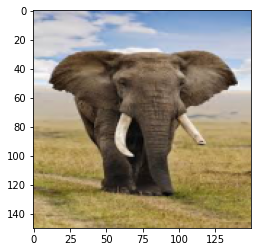

In [44]:
data=[]
url=input('Enter your URL')
img=imread(url)
img_resized = resize(img,(150,150,3))
data.append(img_resized.flatten())
data=np.array(data)
plt.imshow(img_resized)
output=model.predict(data)
output=CATEGORIES[output[0]]
print(f'Predicted Output: {output}')